In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

# Exploring the data

In [2]:
data = pd.read_csv('movies.csv')
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
data.shape

(7668, 15)

In [5]:
data.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [6]:
data.index

RangeIndex(start=0, stop=7668, step=1)

In [7]:
data.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


# Handling Null and Missing Values

Finding all null values across the columns dataframe 

In [9]:
data.isnull().any()

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

Finding the number of null values in each column and drop those columns 

In [10]:
data.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [11]:
data.dropna(subset=['rating', 'released', 'director', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime'],inplace = True)

In [12]:
data.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

# Finding Duplicates

In [13]:
data.duplicated().sum()

0

In [14]:
# Checking column datatypes 
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
data["budget"] = data["budget"].astype("int64")
data["gross"] = data["gross"].astype("int64")
data["votes"] = data["votes"].astype("int64")
data["runtime"] = data["runtime"].astype("int64")
data['genre'] = data['genre'].astype('category')
data['rating'] = data['rating'].astype('category')

In [16]:
data.dtypes

name          object
rating      category
genre       category
year           int64
released      object
score        float64
votes          int64
director      object
writer        object
star          object
country       object
budget         int64
gross          int64
company       object
runtime        int64
dtype: object

In [17]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [18]:
data.shape

(5421, 15)

In [19]:
# creating a new column to store month
data["month_released"] = data["released"].astype(str).str[:3] 

In [20]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,Jun
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,Jul
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,Jun
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,Jul
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,Jul


In [21]:
data['rating'] = data['rating'].replace({"Not Rated":"Unrated","PG-13":"PG"})

In [22]:
data.drop(["released"],axis = 1,inplace = True)

In [23]:
data.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month_released
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,Jun
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,Jul
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,Jun
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,Jul
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,Jul


In [24]:
import sqlite3

In [25]:
#Connect or create database in sqlite
conn = sqlite3.connect('Movie_rating.db')

In [27]:
#Load data into database 
data.to_sql('Movies', conn)

In [26]:
q_all = "Select * from Movies"

In [27]:
d_all = pd.read_sql_query(q_all, conn)

In [28]:
d_all.head()

,index,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month_released
0,0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,Jun
1,1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,Jul
2,2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,Jun
3,3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,Jul
4,4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,Jul


# Explore data to find answers to questions

What movie genre and ratings are mostly produced 

In [29]:
rate = pd.read_sql_query("select rating from Movies", conn)
rate

,rating
0,R
1,R
2,PG
3,PG
4,R
...,...
5416,R
5417,PG
5418,PG
5419,PG


In [30]:
rate.value_counts()

rating  
PG          2636
R           2597
G            111
Unrated       61
NC-17         12
TV-MA          2
Approved       1
X              1
dtype: int64

Text(0.5, 1.0, 'Most produced ratings')

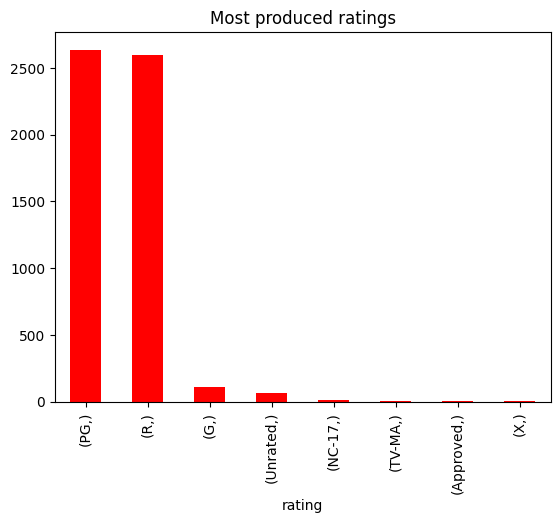

In [31]:
#Most produces rating
rate.value_counts().plot(kind = 'bar', color = 'red')
plt.title('Most produced ratings')

In [32]:
gen = pd.read_sql_query("select genre from Movies", conn)

In [33]:
#Most produced genre 
gen.value_counts()

genre    
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
dtype: int64

Text(0.5, 1.0, 'Most produced genres')

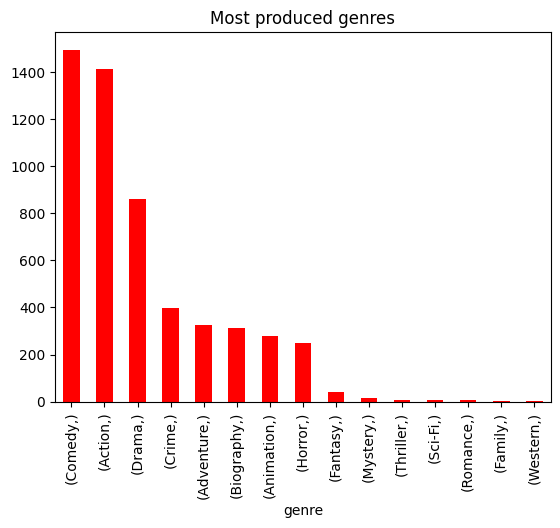

In [34]:
gen.value_counts().plot(kind = 'bar', color ='red')
plt.title('Most produced genres')

What genre which has generated the most revenue 

In [35]:
genrev = pd.read_sql_query("select genre, gross from Movies ", conn)

In [36]:
#Genre with the most average revenue 
datd = genrev.groupby(['genre']).mean()['gross']

In [37]:
datd = datd.sort_values(ascending = False)

Text(0.5, 1.0, 'Average revenues of genre')

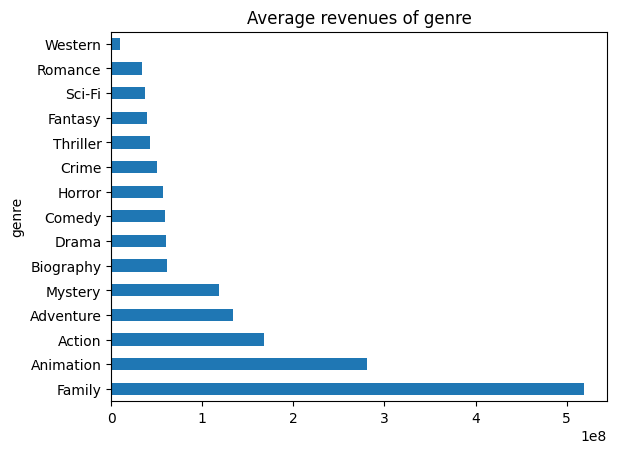

In [38]:
datd.plot(kind = 'barh')
plt.title('Average revenues of genre')

Genre with the highest average score

In [39]:
scoav = pd.read_sql_query("select genre, score from Movies ", conn)

In [40]:
ga = scoav.groupby(['genre']).mean()['score']

In [41]:
ga = ga.sort_values(ascending=False)

Text(0.5, 1.0, 'Average score of genres')

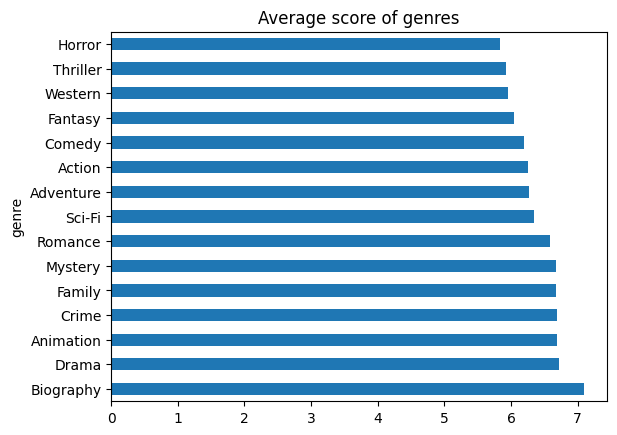

In [42]:
ga.plot(kind = 'barh')
plt.title('Average score of genres')

Average score of genres

In [43]:
fam = pd.read_sql_query("select genre, budget from Movies ", conn)

In [44]:
ff = fam.groupby(['genre']).mean()['budget']

In [45]:
ff = ff.sort_values(ascending=False)

Text(0.5, 1.0, 'Average budget of genres')

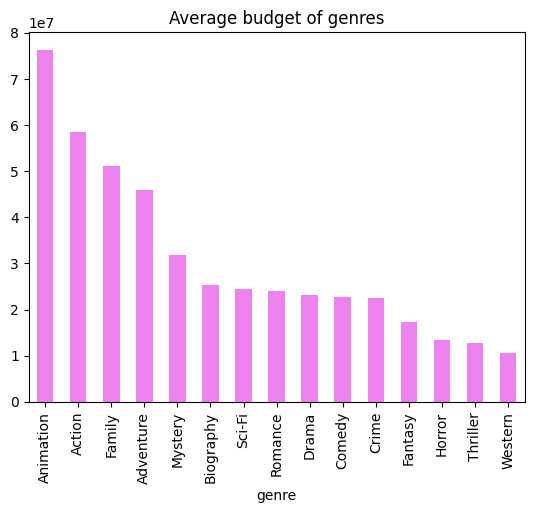

In [47]:
ff.plot(kind = 'bar', color = 'violet')
plt.title('Average budget of genres')

Highest and lowest score movies 

In [76]:
top10 = pd.read_sql_query("select name, genre, score from Movies Order by score Desc limit 10", conn)
top10

,name,genre,score
0,The Shawshank Redemption,Drama,9.3
1,The Dark Knight,Action,9.0
2,Schindler's List,Biography,8.9
3,Pulp Fiction,Crime,8.9
4,The Lord of the Rings: The Return of the King,Action,8.9
5,Forrest Gump,Drama,8.8
6,Fight Club,Drama,8.8
7,The Lord of the Rings: The Fellowship of the Ring,Action,8.8
8,Inception,Action,8.8
9,Star Wars: Episode V - The Empire Strikes Back,Action,8.7


In [77]:
last10 = pd.read_sql_query("select name, genre, score from Movies Order by score Asc limit 10", conn)
last10

,name,genre,score
0,Superbabies: Baby Geniuses 2,Comedy,1.9
1,Disaster Movie,Comedy,1.9
2,House of the Dead,Action,2.1
3,From Justin to Kelly,Comedy,2.1
4,Leonard Part 6,Action,2.2
5,Son of the Mask,Comedy,2.2
6,Who's Your Caddy?,Comedy,2.2
7,Glitter,Drama,2.3
8,Alone in the Dark,Action,2.4
9,Epic Movie,Adventure,2.4


Highest revenue movie 

In [84]:
toprev = pd.read_sql_query("select name, genre, gross, country from Movies Order by gross Desc limit 10", conn)
toprev

,name,genre,gross,country
0,Avatar,Action,2847246203,United States
1,Avengers: Endgame,Action,2797501328,United States
2,Titanic,Drama,2201647264,United States
3,Star Wars: Episode VII - The Force Awakens,Action,2069521700,United States
4,Avengers: Infinity War,Action,2048359754,United States
5,The Lion King,Animation,1670727580,United States
6,Jurassic World,Action,1670516444,United States
7,The Avengers,Action,1518815515,United States
8,Furious 7,Action,1515341399,United States
9,Frozen II,Animation,1450026933,United States


Relationship between runtime and score 

In [49]:
runsco = pd.read_sql_query("select score , runtime from Movies",conn)

In [50]:
runsco['score'].corr(runsco['runtime'])

0.4140677219634846

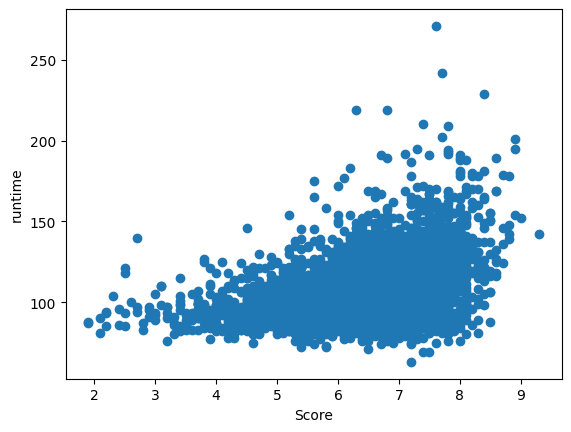

In [83]:
plt.scatter(runsco['score'],runsco['runtime'])
plt.xlabel('Score')
plt.ylabel('runtime')
plt.show()

Relationship between budget and gross  

In [85]:
budgro = pd.read_sql_query("select budget , gross from Movies",conn)

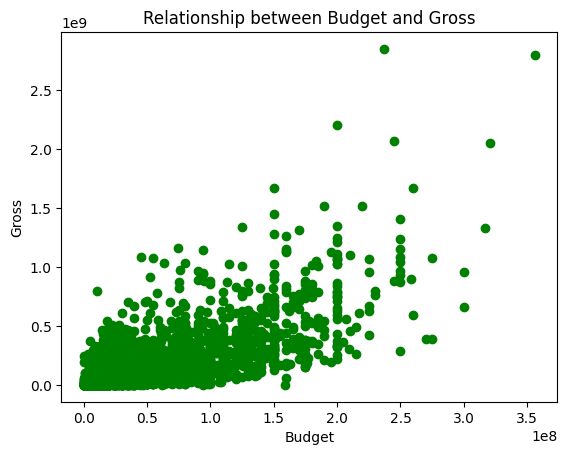

In [106]:
plt.scatter(budgro['budget'],budgro['gross'], color = 'green')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Relationship between Budget and Gross')
plt.show()

Change in average budge over time 

In [102]:
yeabud = pd.read_sql_query("select year, budget from Movies",conn)

In [104]:
yb = yeabud.groupby('year')['budget'].mean()

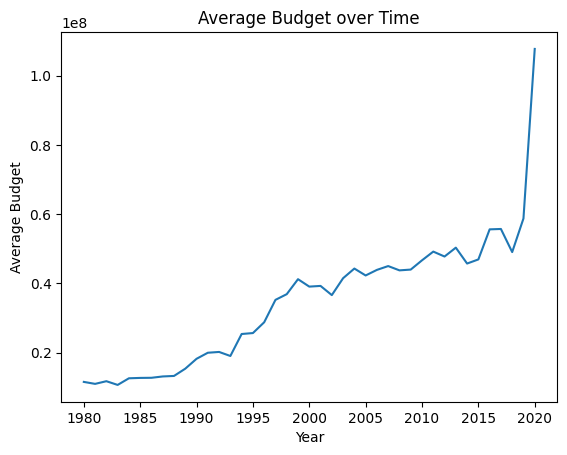

In [105]:
plt.plot(yb.index, yb)
plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.title('Average Budget over Time')
plt.show()

Which season does movies release have a high gross

In [51]:
season = pd.read_sql_query("select month_released, gross from Movies",conn)

In [52]:
summer = season[season['month_released'].isin(['Jun', 'Jul', 'Aug'])]
summer_gross = summer['gross'].mean()

In [53]:
Autumn = season[season['month_released'].isin(['Sep', 'Oct', 'Nov'])]
Autumn_gross = Autumn['gross'].mean()

In [54]:
spring = season[season['month_released'].isin(['Mar', 'Apr', 'May'])]
spring_gross = spring['gross'].mean()

In [55]:
winter = season[season['month_released'].isin(['Dec', 'Jan', 'Feb'])]
winter_gross = winter['gross'].mean()

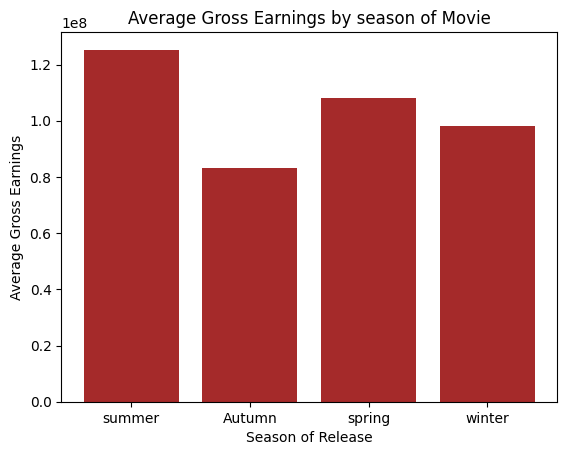

In [56]:
plt.bar(['summer', 'Autumn', 'spring','winter'], [summer_gross, Autumn_gross, spring_gross, winter_gross], color = 'brown')
plt.xlabel('Season of Release')
plt.ylabel('Average Gross Earnings')
plt.title('Average Gross Earnings by season of Movie')
plt.show()